In [393]:
import numpy as np
import matplotlib.pyplot as plt 
import statistics

In [394]:
# Parameters 
L = 1  # length of the domain
T = L / (2 * np.pi * 50) # total time, ~ L / k0
nx = 200  # number of spatial points
nt = 200  # number of time steps

dx = L / nx
dt = T / nt

x = np.linspace(0, L, nx)

In [395]:
# Potential initial conditions 
V0 = 0.5*(np.pi * 50)**2  # potential strength
a = 0.2 #0.032  # width
V = np.zeros(nx)
V[int((nx - a * nx) / 2):int((nx + a * nx) / 2)] = V0 # indices for start and end of the well 

In [396]:
# Gaussian wave packet
x0 = L / 4  # center of the wave packet
k0 = 2 * np.pi * 50 #2*np.sqrt(V0) #(L / 2*T) / 2 #np.pi * 50 # # wave number of the wave packet (p = hbar*k)
sigma = L / 20  # width of the wave packet
gaussian = np.exp(-0.5 * ((x - x0) / sigma) ** 2)
phase = np.exp(1j * k0 * x)
psi0 = gaussian * phase

In [397]:
# Build coefficient matrix, a+
aplus = np.zeros((nx, nx),complex)
nu = 1j * dt / (4 * dx**2) # kinetic energy operator

for i in range(len(aplus) - 1): # off diagonal 
    aplus[i,i+1] = aplus[i+1,i] = -nu 

for i in range(len(aplus)): # diagonal
    aplus[i,i] = 1 + 2 * nu 

aplus_inv = np.linalg.inv(aplus)


In [398]:
# Build coefficient matrix, a-
aminus = np.zeros((nx, nx),complex)

for i in range(len(aminus)-1): # off diagonal 
    aminus[i,i+1] = aminus[i+1,i] = nu  

for i in range(len(aminus)): # diagonal
    aminus[i,i] = 1 - 2 * nu 

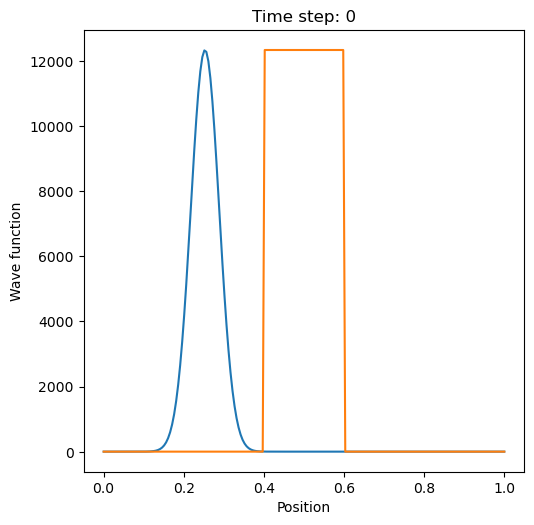

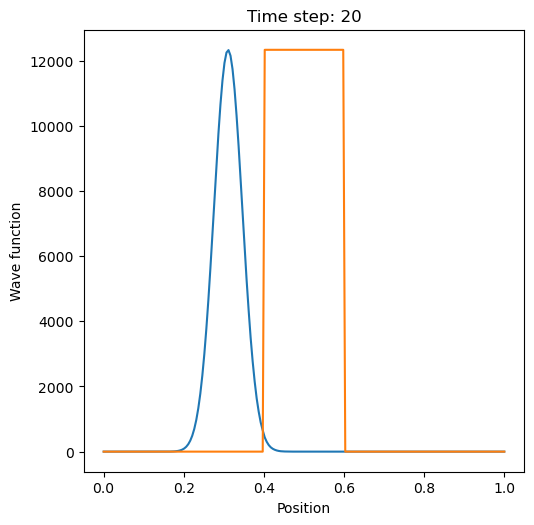

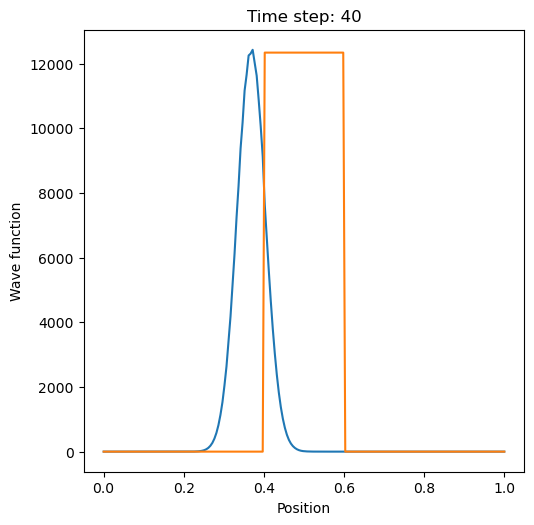

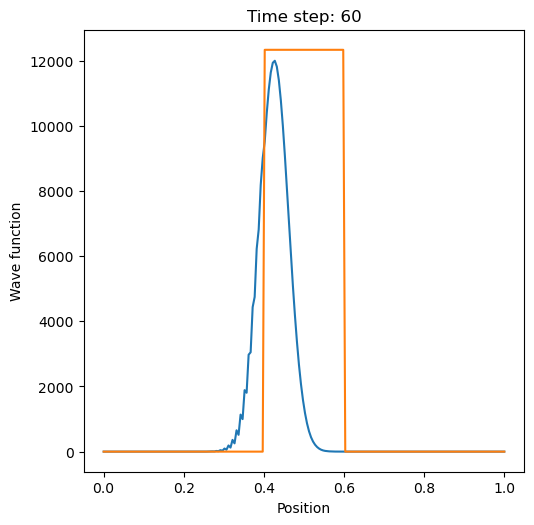

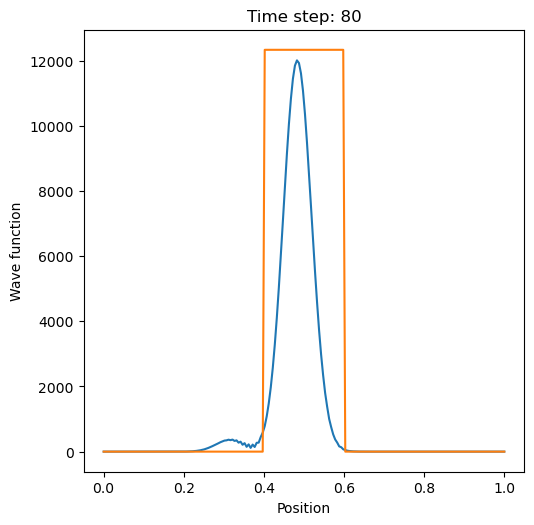

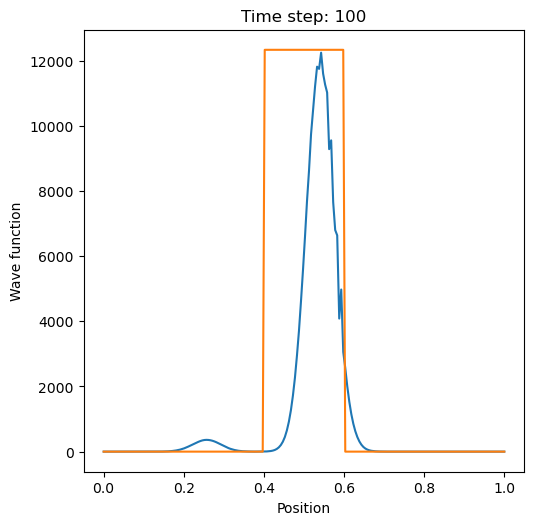

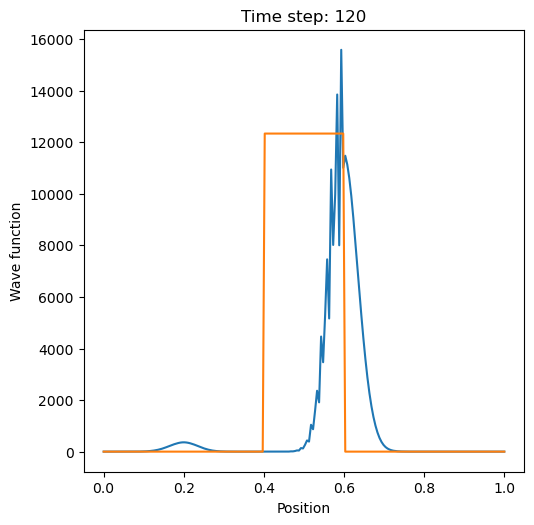

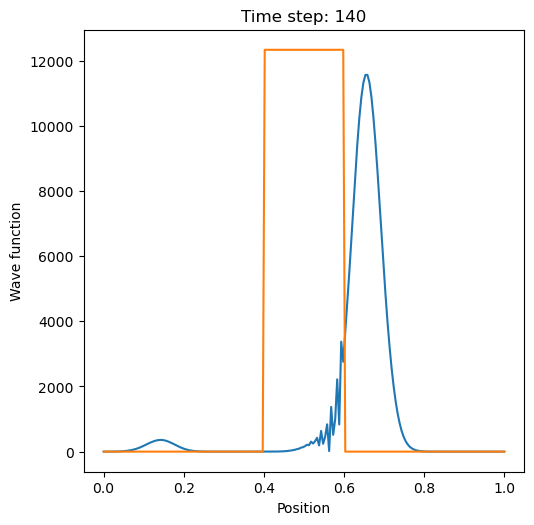

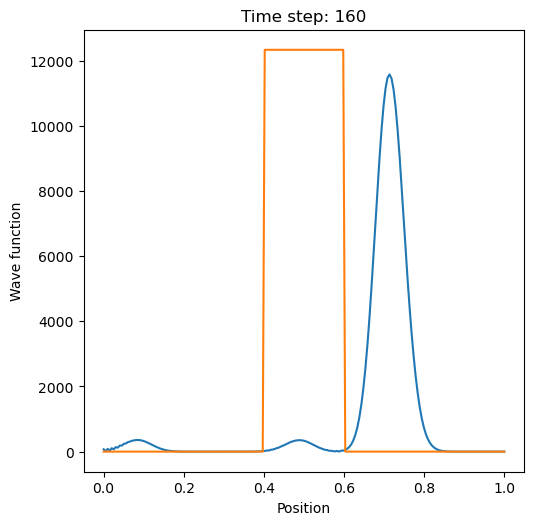

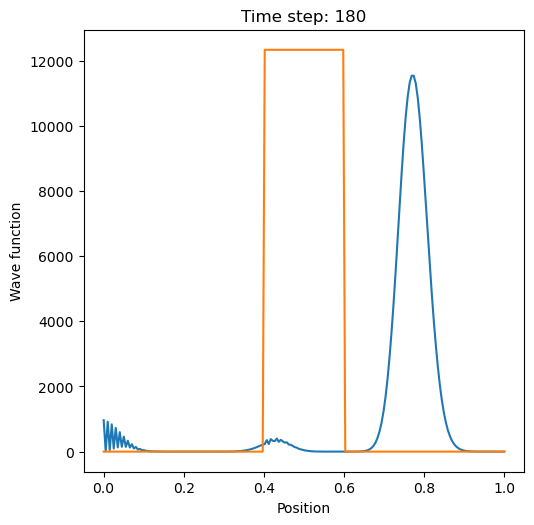

In [399]:
# Crank-Nicholson
for t in range(nt):
    f = np.exp(-1j * dt * V) * psi0
    psi = np.dot(aplus_inv, np.dot(aminus, f))
    psi0 = psi
    
    # plotting 
    if t % 20 == 0:
        # plt.plot(x, np.abs(psi))#, label=f'Time step: {t}')
        plt.figure(figsize=(10, 500))
        num_cols = 2  # Number of columns for subplots
        num_rows = (nt + num_cols - 1) // num_cols

        plt.subplot(num_rows, num_cols, t + 1)
        plt.plot(x, np.abs(psi)**2 * V0)
        plt.plot(x, V)
        plt.title(f'Time step: {t}')
        plt.xlabel('Position')
        plt.ylabel('Wave function')
        plt.tight_layout()
    
plt.show()

# plt.plot(x, V, label='Potential (V)')
# plt.xlabel('Position')
# plt.ylabel('Wave function')
# plt.title('Gaussian wave packet scattering (TDSE w/ CN)')
# plt.legend()
# plt.show()


In [400]:
# Reflection and transmisison coefficients 
start = int((nx - a * nx) / 2)
end = int((nx + a * nx) / 2)
median = int(statistics.median([start, end]))
center = median # center of well
width = end - start # width of the well in spacial domain 

# Extract wavefunction segments for each region
incident_wavefunction = psi[0: center] 
reflected_wavefunction = psi[center - 2 * width: center - width] 
transmitted_wavefunction = psi[center: center + width] 

# Calculate
R = np.sum((reflected_wavefunction) ** 2) / np.sum((incident_wavefunction) ** 2)
T = np.sum((transmitted_wavefunction) ** 2) / np.sum((incident_wavefunction) ** 2)

print(f"Reflection coefficient (R): {R}")
print(f"Transmission coefficient (T): {T}")



Reflection coefficient (R): (0.006873631846280347-0.004745724290905483j)
Transmission coefficient (T): (-0.0007139249371751038-2.3986652479304053e-05j)


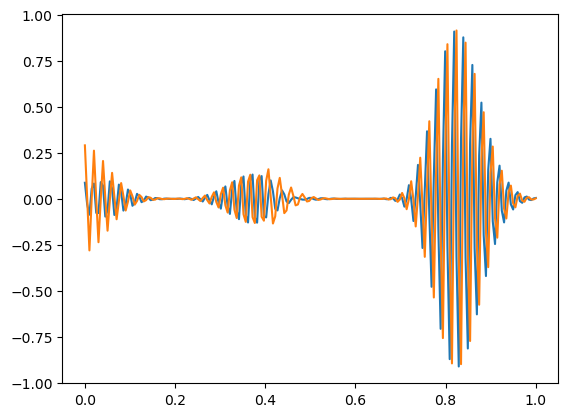

In [401]:
f = np.exp(-1j * dt * V) * psi0
# plt.plot(x, V)
plt.plot(x, f.real)
plt.plot(x, f.imag)
plt.show()